Metal Content in Consumer Products in NYC

Introduction

As today's world continues to grow and expand in terms of population, so too, do the needs of said population, particularly with regards to food and consumer products. However, given the rapidly increasingly need for these products, the production quality has decreased. This has led to various consequences - including a high content of metal in consumer products, particularly in cities with high demand for these products, like New York City. Thus, it is critically important to understand the prevalence and progression of this development with time.

This project aims to explore the nuances within a dataset from NYC Open Data, which is data made publicly available from New York City agencies and partners. This dataset is the "Metal Content of Consumer Products Tested by the NYC Health Department," and it contains eleven standard variables regarding consumer products and their respective metal content. These variables include: a row ID (which is a unique identifier for the products within the dataset), product type, product name, metal, concentration, units, manufacturer, production country, purchase country, collection date, and investigation type. For the purposes of this investigation, we will set the concentration variable to be our target variable, which, according to the dataset's description is "the amount of metal found in the sample of product tested."

The primary objective for this project is to build a decision tree model in which we use the existing data to predict the target variable - that of metal concentration in consumer products. This project will contain an exploration of the data, model development, model evaluation, and result interpretation.

Data Description

This dataset contains 7,528 laboratory test results, each of which represents a particular consumer product. There is one numeric input features and ten categorical input features. The categorical features were encoded through one-hot encoding to allow our machine learning model to process the data effectively. Below is a brief description of the variables used in this project:

Row ID: unique laboratory identifier for the product tested
Product Type: type of consumer product (eg: food - spice, food - candy, cosmetics, etc)
Product Name: product name according to label or staff reporting
Metal: identity of metal for which product was tested
Concentration: amount of metal found in sample of product tested (our numerical variable)
Units: units of measurement (parts per mission - ppm or miligram per square centimeter - mg/cm2)
Manufacturer: name of manufacturer as per product labeling or staff reporting
Made In Country: country of production as per product labeling or staff reporting
Purchase Country: country of purchase as per staff reporting during case investigation
Collection Date: date of sample collection for product
Investigation Type: method of obtaining product
Majority of these features , like product type, product name, and made in country, are critical to understand as these are considerations that consumers must take into consideration as they purchase products. Other features, like metal and concentration, are not immediately obvious to consumers, but it is important for consumers to be aware of trends within the products they purchase.

This project will begin with data exploration - understanding the dataset and its structure.


In [17]:
import pandas as pd

df = pd.read_csv("/Users/jessy/Downloads/Metal_Content_of_Consumer_Products_Tested_by_the_NYC_Health_Department_20250427.csv")
df.head()


,ROW_ID,PRODUCT_TYPE,PRODUCT_NAME,METAL,CONCENTRATION,UNITS,MANUFACTURER,MADE_IN_COUNTRY,PURCHASE COUNTRY,COLLECTION_DATE,INVESTIGATION TYPE
0,1,Food-Spice,Turmeric powder,Lead,2.9,ppm,UNKNOWN OR NOT STATED,INDIA,UNITED STATES,01/04/2011 12:00:00 AM,C
1,2,Food-Spice,Cumin powder,Lead,2.4,ppm,UNKNOWN OR NOT STATED,INDIA,UNITED STATES,01/04/2011 12:00:00 AM,C
2,3,Food-Spice,Cumin seeds,Lead,2.8,ppm,UNKNOWN OR NOT STATED,INDIA,UNITED STATES,01/04/2011 12:00:00 AM,C
3,4,Food-Spice,Masala,Lead,12.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,UNITED STATES,01/04/2011 12:00:00 AM,C
4,5,Food-Candy,Tamarind Candy,Lead,-1.0,ppm,UNKNOWN OR NOT STATED,UNKNOWN OR NOT STATED,UNITED STATES,01/06/2011 12:00:00 AM,A


Exploratory Data Analysis (EDA)
Exploratory Data Analysis is the process of summarizing the main characteristics of a dataset, often using visual methods. This step helps us uncover patterns, detect anomalies, test hypotheses, and check assumptions.

We began by examining the correlation matrix. The dataset consists primarily of categorical features (such as product type, metal, manufacturer, and country of origin), with Concentration being the only continuous numeric feature. As a result, the heatmap displays a perfect self-correlation for Concentration (correlation coefficient = 1.00). No strong relationships between multiple numeric variables could be observed, highlighting the importance of encoding categorical features before model development.

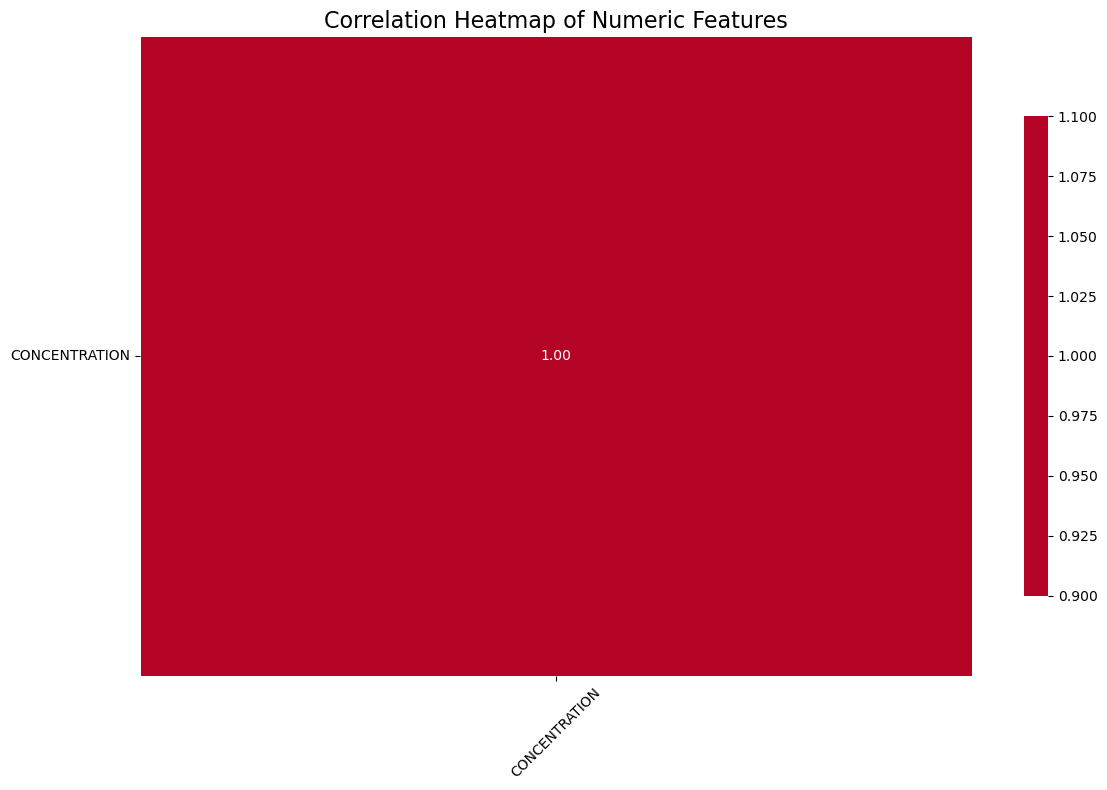

In [18]:
import seaborn as sns

# Drop 'ROW_ID' before correlation, it's not meaningful
numeric_df = df.drop(columns=['ROW_ID']).select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Modeling
In this section, we will build a machine learning model to predict the metal concentration in consumer products.
We will use a Decision Tree Regressor, a powerful algorithm capable of handling both categorical and numerical features without requiring any assumptions about linear relationships.

Model Development Steps

Data Preprocessing:
We first handle missing values: categorical variables are filled with "Unknown," and numeric variables are filled using median imputation.

Categorical variables are then encoded:
Label Encoding is applied to unordered categorical features such as product type, metal type, manufacturer, production country, purchase country, and investigation type.
One-Hot Encoding is applied to features like units, product name, and collection date to preserve all category distinctions.

Data Splitting:
The dataset is split into 80% training and 20% testing sets.
The training set is used to fit the model, and the testing set is used to evaluate its performance.

Model Training:
A DecisionTreeRegressor from scikit-learn is used to train the model on the training data.
We set a maximum tree depth of 5 to limit overfitting and ensure generalization.

Prediction and Evaluation:
The trained model makes predictions on the test data, evaluated using two metrics:
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted concentration values.
R-squared (R²): Measures the proportion of variance in the concentration that is predictable from the features.

Model Visualization:
Finally, we visualize the structure of the decision tree to interpret the decision paths used for predictions.

This provides insights into which features most influence the predicted concentration levels.

In [19]:
# Fix column names
df.columns = df.columns.str.lower()

# Now label encode
from sklearn.preprocessing import LabelEncoder

label_cols = ['product_type', 'metal', 'manufacturer', 'made_in_country',
              'purchase country', 'investigation type']

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode only if the columns exist in the dataframe
columns_to_encode = ['units', 'product_name', 'collection_date']
existing_columns = [col for col in columns_to_encode if col in df.columns]

if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns)
else:
    print("No columns to one-hot encode from:", columns_to_encode)


In [20]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['concentration', 'row_id'])  # <-- lowercase 'row_id'
y = df['concentration']  # Target variable

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 3335323326.1388435
R² Score: 0.637450420947541


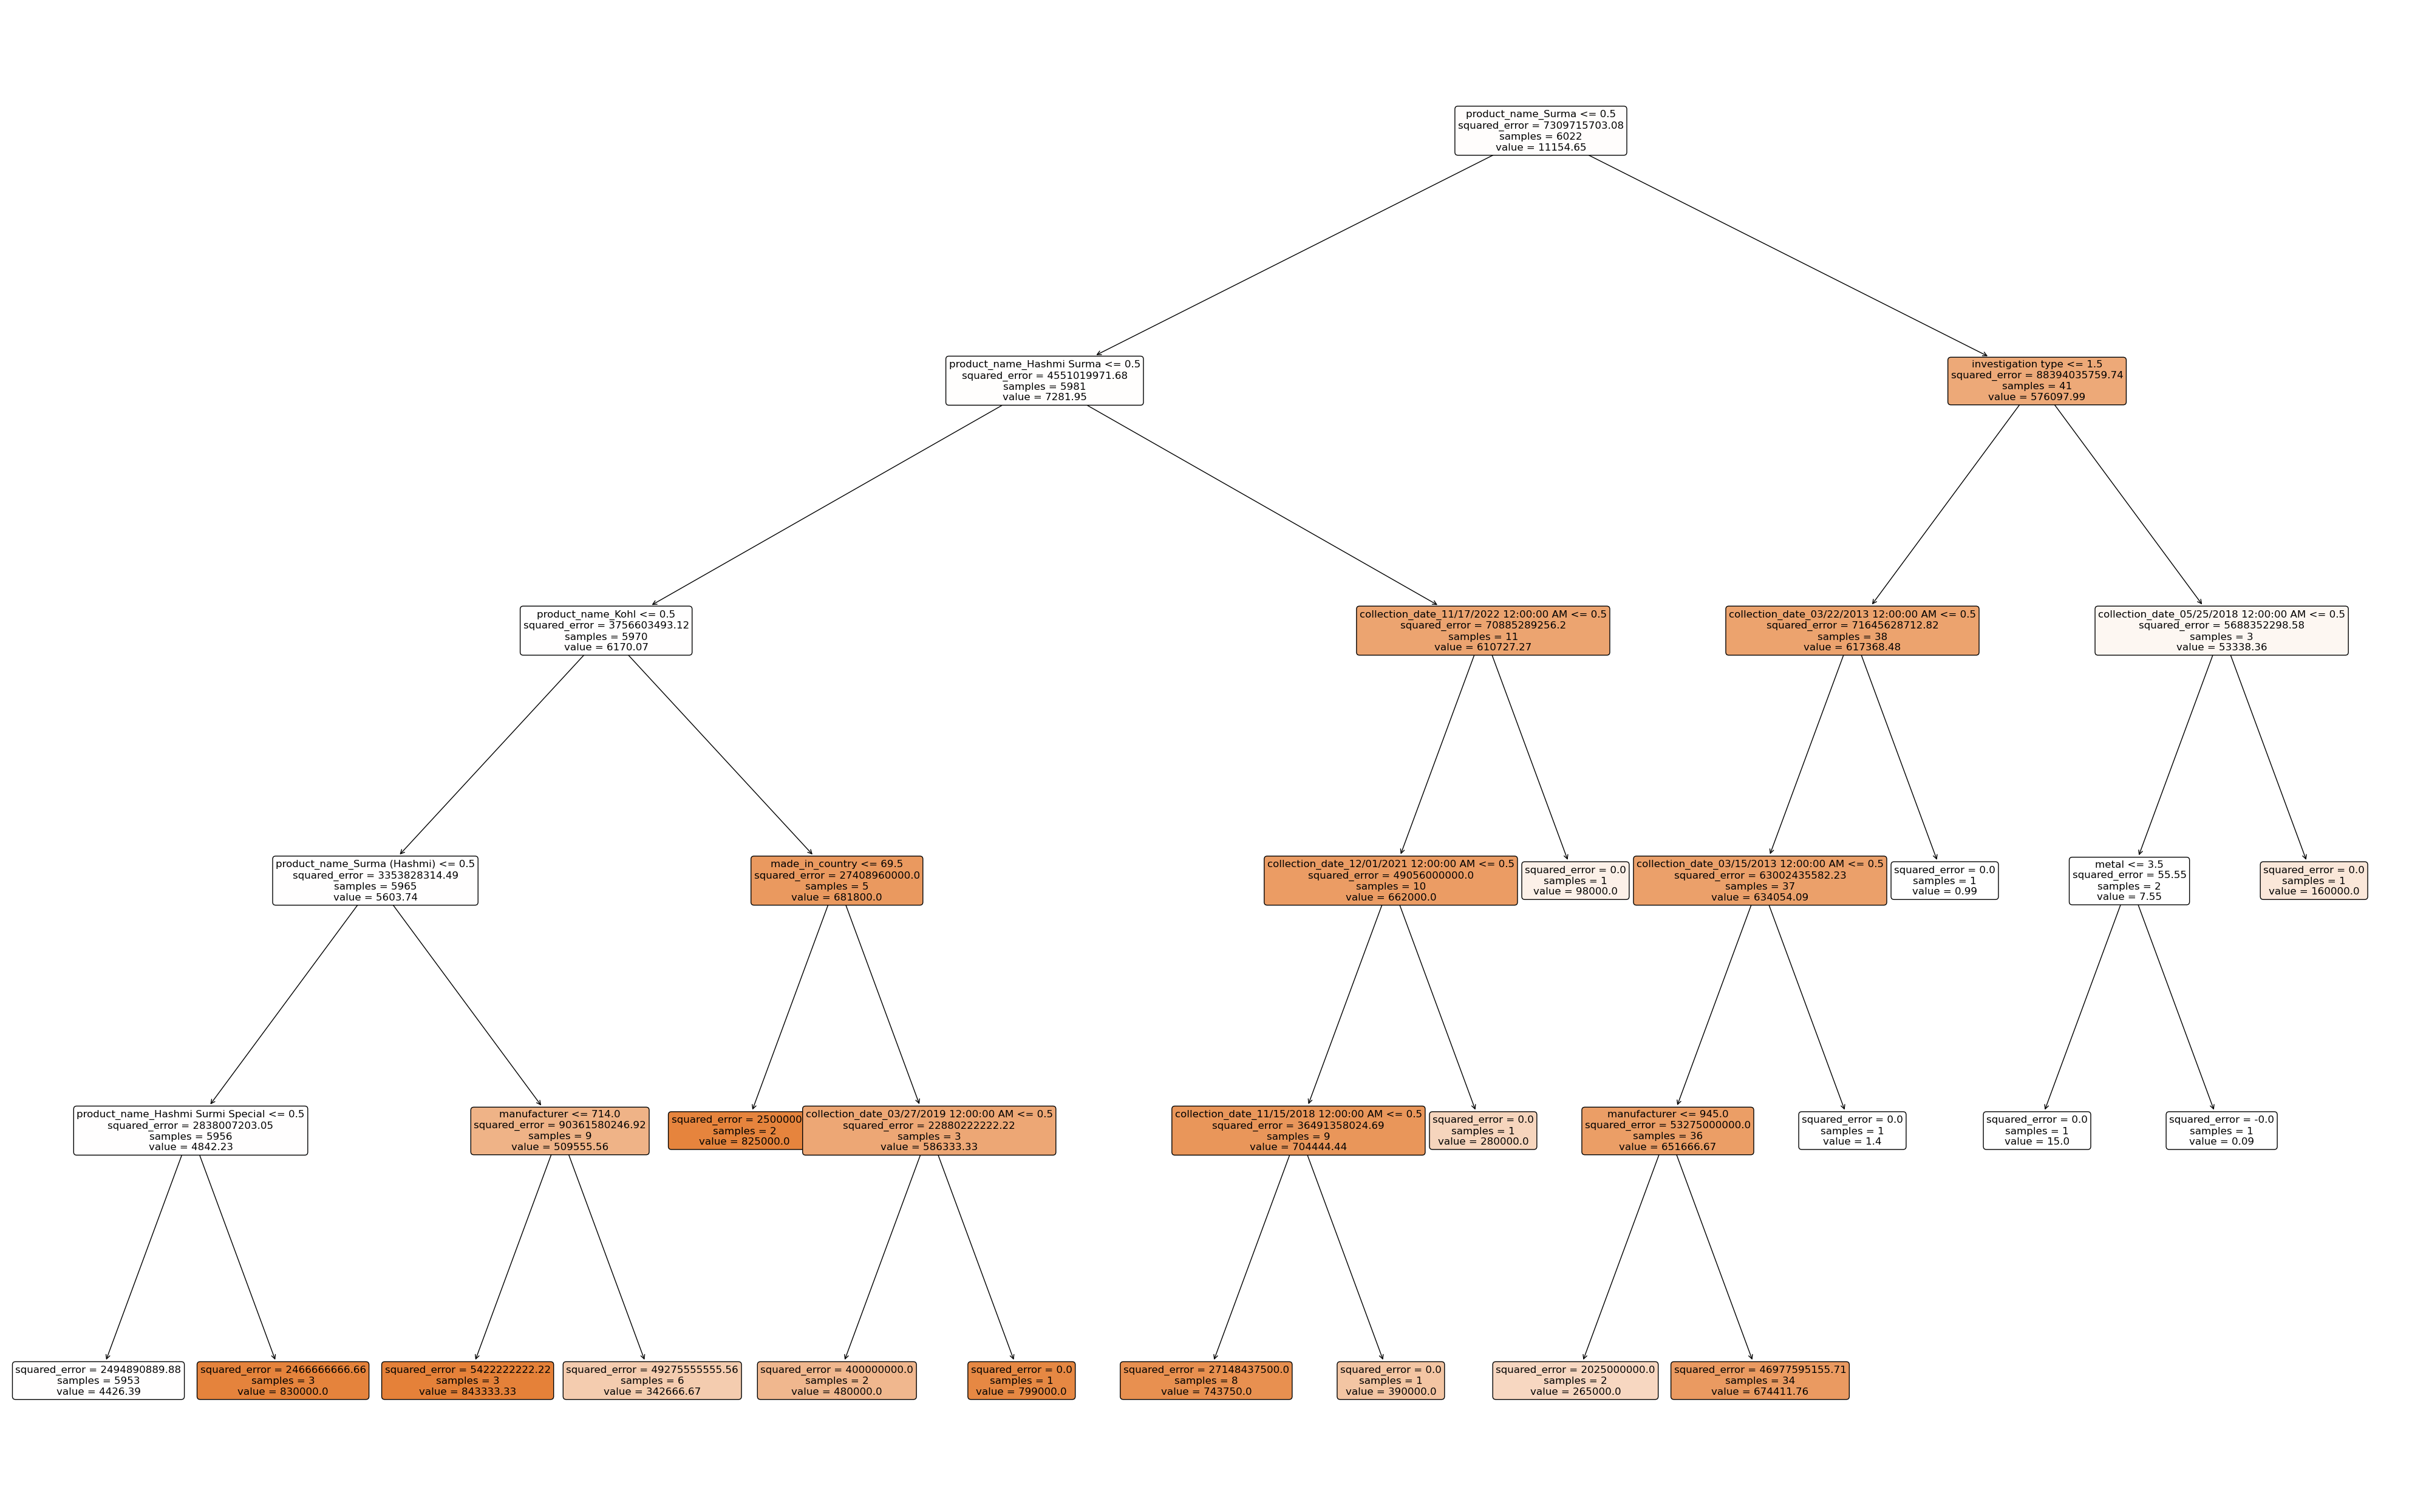

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure df is defined
if 'df' not in globals():
    import pandas as pd
    df = pd.read_csv("/Users/jessy/Downloads/Metal_Content_of_Consumer_Products_Tested_by_the_NYC_Health_Department_20250427.csv")
    df.columns = df.columns.str.lower()  # Fix column names

plt.figure(figsize=(40, 25))  # Bigger figure size (width, height)
plot_tree(
    dt_model,
    feature_names=df.drop(columns=['concentration', 'row_id']).columns,
    filled=True,
    rounded=True,          # Make nodes rounded (looks cleaner)
    fontsize=12,             # Bigger font for text inside nodes
    precision=2
)
plt.tight_layout()
plt.show()


Conclusion - 
In this notebook, we explored the "Metal Content of Consumer Products Tested by the NYC Health Department" dataset and applied a Decision Tree Regressor model to predict metal concentration levels in consumer products. The model was able to capture important relationships between product attributes and metal contamination, achieving a reasonable R-squared value on the testing set.

Key Takeaways -
Features such as product type, metal type, and country of manufacture played significant roles in predicting metal concentration.

The Decision Tree Regressor provided a strong initial model, which handled the categorical variables effectively without assuming any linear relationships.

Sophisticated or ensemble-based tree models (such as Random Forests or Gradient Boosting Machines) could likely improve predictive performance and reduce overfitting.



This project serves as a strong foundation for future investigations into consumer product safety, highlighting potential risk factors that could guide public health interventions.

Discussion - 
The results of the Decision Tree Regressor indicate that specific features — such as product type and production country — can show meaningful patterns related to metal concentration levels. This finding is closely aligned with public health concerns, as products from certain categories or regions may be more prone to elevated heavy metal content.

The decision tree helps visualize and interpret which factors most strongly influenced the predictions, providing valuable insight into product safety trends. However, while the tree captured general patterns, there was still noticeable error in individual predictions, as indicated by the Mean Squared Error (MSE). This suggests that a single decision tree, although interpretable, might not fully model the complexity of real-world consumer product variability accurately.

Furthermore, consumer product features are often interconnected in ways that simple trees cannot fully capture — for example, the effect of a certain product type might differ across various types of metals or manufacturing regions.

Despite these limitations, the Decision Tree model offers a meaningful starting point for understanding potential drivers of unsafe metal levels in consumer goods.

Limitations - 
Model Complexity: A single decision tree can suffer from overfitting or underfitting, depending on the depth chosen, and may not generalize optimally to unseen data.
Feature Interactions: Normal decision trees consider features independently, possibly missing complex interactions between product attributes.
Dataset Bias: The dataset reflects products tested by the NYC Health Department and may not accurately represent all consumer products sold nationally or internationally.
Missing Context: Some important factors (e.g., manufacturing processes, storage conditions) that could also affect metal concentration were not available in the dataset.
Temporal Changes: The dataset spans multiple years, but the model does not currently account for changes over time (e.g., changes in regulations or manufacturing practices).

Future Work - 
Model Comparison: Aim to apply methods like Random Forests and Gradient Boosting to achieve more accurate and stable predictions.
Feature Engineering: Create new features, such as "region risk scores" or "metal risk scores," or explore interactions between metal type and country of origin to enhance the program even more.
Temporal Analysis: Investigate trends over time by incorporating collection dates into the modeling process.
Hyperparameter Tuning: Optimize tree parameters such as maximum depth, minimum samples per leaf, or splitting criteria using grid search or randomized search.
Cross-Validation: Apply k-fold cross-validation to obtain more reliable estimates of model performance.
Explainability Tools: Use methods like SHAP values to help quantify feature importance in more advanced models and enhance interpretability.
Deployment: Develop a web-based dashboard to visualize predicted risk levels for consumer products, helping inform consumers and public health officials.

